In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import matplotlib.dates as mdates

# MIXED


In [28]:
#Import files
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_MIXED_fullData_final")
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/ MIXED_SS_fixedfleet")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df= pd.concat([pd.read_csv(f) for f in bike_filenames ])


In [29]:
user_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Trip Served',
       'Wait Time (min)', 'Departure Time', 'Arrival Time', 'Duration (min)',
       'Origin [lat]', 'Origin [lon]', 'Destination [lat]',
       'Destination [lon]', 'Distance (m)'],
      dtype='object')

In [30]:
user_df['Wait Time (min)'].describe()


count    847968.000000
mean          4.004230
std           3.661186
min           0.250000
25%           1.500000
50%           2.833333
75%           5.333333
max          40.666667
Name: Wait Time (min), dtype: float64

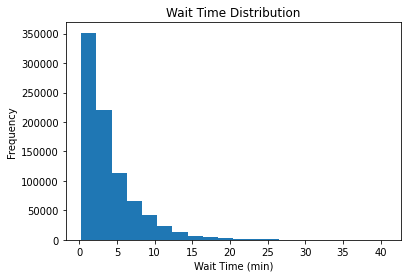

In [31]:

user_df['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [32]:
food_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Trip Served',
       'Wait Time (min)', 'Departure Time', 'Arrival Time', 'Duration (min)',
       'Origin [lat]', 'Origin [lon]', 'Destination [lat]',
       'Destination [lon]', 'Distance (m)'],
      dtype='object')

In [33]:
food_df['Wait Time (min)'].describe()


count    291892.000000
mean          7.141529
std           5.804567
min           0.250000
25%           2.250000
50%           5.333333
75%          10.916667
max          55.250000
Name: Wait Time (min), dtype: float64

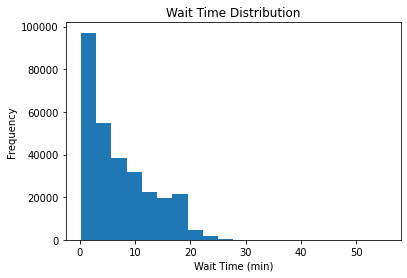

In [34]:

food_df['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [35]:
bike_df.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'UrgencyPerson', 'UrgencyPackage', 'UrgencyWeight',
       'WaitWeight', 'ProximityWeight', 'Agent', 'Event', 'Activity',
       'Message', 'Start Time', 'End Time', 'Duration (min)',
       'Distance Traveled', 'Start Battery %', 'End Battery %',
       'Battery Gain %'],
      dtype='object')

In [36]:
bike_df.head()

,Cycle,Day,Time,NumBikes,Battery,AutDrivingSpeed,MaxBiddingTime,UrgencyPerson,UrgencyPackage,UrgencyWeight,...,Event,Activity,Message,Start Time,End Time,Duration (min),Distance Traveled,Start Battery %,End Battery %,Battery Gain %
0,1,1,00:00:05,475,70000.0,8.0,0.5,1,0,0.25,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:00:05,475,70000.0,8.0,0.5,1,0,0.25,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,00:00:05,475,70000.0,8.0,0.5,1,0,0.25,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,00:00:05,475,70000.0,8.0,0.5,1,0,0.25,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,00:00:05,475,70000.0,8.0,0.5,1,0,0.25,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
bike_df.groupby('Event')['Distance Traveled'].describe()


,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_packages,289643.0,1866.342827,1092.664786,0.0,968.158565,1790.590114,2530.641957,5802.145508
END: in_use_people,848069.0,2295.320412,1081.019889,0.0,1533.915309,2148.330136,2945.247012,7888.140949
END: low_battery,131242.0,496.851336,316.682516,0.0,292.850568,426.801252,625.991346,3084.530249
END: picking_up_packages,289712.0,917.699192,772.466095,0.0,268.788886,681.069608,1402.235243,7360.873600
END: picking_up_people,848569.0,474.630636,475.932000,0.0,144.007210,323.775792,658.465613,5323.165577
END: rebalancing,104994.0,2063.070194,1478.885940,0.0,672.020895,1931.630431,3177.069956,7888.140949
END: wandering,1370100.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
START: in_use_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: in_use_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df)



                         Event  Distance Percentage
0         END: in_use_packages            15.725278
1           END: in_use_people            56.626324
2             END: low_battery             1.896894
3     END: picking_up_packages             7.734116
4       END: picking_up_people            11.716200
5             END: rebalancing             6.301187
6               END: wandering             0.000000
7       START: in_use_packages             0.000000
8         START: in_use_people             0.000000
9           START: low_battery             0.000000
10  START: picking_up_packages             0.000000
11    START: picking_up_people             0.000000
12          START: rebalancing             0.000000
13            START: wandering             0.000000


In [39]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df)

                         Event  Time Percentage
0         END: in_use_packages         2.071460
1           END: in_use_people         5.821172
2             END: low_battery         0.253831
3     END: picking_up_packages         1.016216
4       END: picking_up_people         1.621352
5             END: rebalancing         0.265159
6               END: wandering        88.950811
7       START: in_use_packages         0.000000
8         START: in_use_people         0.000000
9           START: low_battery         0.000000
10  START: picking_up_packages         0.000000
11    START: picking_up_people         0.000000
12          START: rebalancing         0.000000
13            START: wandering         0.000000


# USERS

In [14]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_USER_fullData_final")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df_u= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Bike events
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_u= pd.concat([pd.read_csv(f) for f in bike_filenames ])

In [15]:
user_df_u['Wait Time (min)'].describe()

count    536035.000000
mean          3.680714
std           2.855769
min           0.250000
25%           1.583333
50%           2.916667
75%           5.083333
max          31.250000
Name: Wait Time (min), dtype: float64

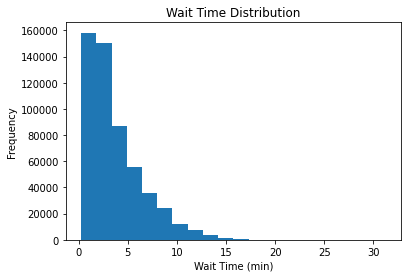

In [16]:

user_df_u['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [17]:
bike_df_u.groupby('Event')['Distance Traveled'].describe()


,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_people,536049.0,1623.180878,927.765194,0.0,999.151539,1436.235169,2018.945457,7619.097243
END: low_battery,24871.0,217.700243,155.446103,0.0,113.667018,201.974246,296.185058,1585.590035
END: picking_up_people,536369.0,423.740397,391.211634,0.0,134.943717,327.117785,601.557185,3611.879962
END: wandering,561280.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
START: in_use_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: low_battery,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: picking_up_people,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: wandering,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_u.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_u = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_u)

                      Event  Distance Percentage
0        END: in_use_people            78.899564
1          END: low_battery             0.490970
2    END: picking_up_people            20.609466
3            END: wandering             0.000000
4      START: in_use_people             0.000000
5        START: low_battery             0.000000
6  START: picking_up_people             0.000000
7          START: wandering             0.000000


In [19]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_u.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_u = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_u)

                      Event  Time Percentage
0        END: in_use_people         7.785165
1          END: low_battery         0.069464
2    END: picking_up_people         2.748288
3            END: wandering        89.397082
4      START: in_use_people         0.000000
5        START: low_battery         0.000000
6  START: picking_up_people         0.000000
7          START: wandering         0.000000


# FOOD

In [20]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_FOOD_fullData_final")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df_f= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_f= pd.concat([pd.read_csv(f) for f in bike_filenames ])

In [21]:
food_df_f['Wait Time (min)'].describe()

count    1.161531e+06
mean     4.850235e+00
std      3.825737e+00
min      0.000000e+00
25%      2.166667e+00
50%      4.000000e+00
75%      6.583333e+00
max      5.783333e+01
Name: Wait Time (min), dtype: float64

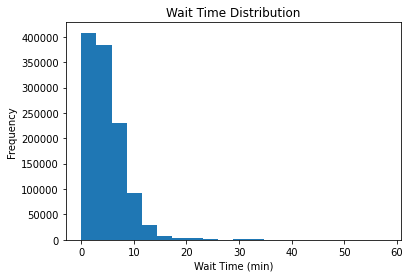

In [22]:

food_df_f['Wait Time (min)'].plot.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [23]:
bike_df_f.groupby('Event')['Distance Traveled'].describe()

,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: in_use_packages,1142140.0,1374.541700,1117.574598,0.0,549.256526,1085.045653,1861.786021,6810.574838
END: low_battery,50082.0,241.073494,161.056727,0.0,133.626100,215.078433,328.434534,1459.135298
END: picking_up_packages,1142140.0,586.220583,507.593040,0.0,237.017395,478.947724,818.633839,7702.095918
END: rebalancing,40798.0,2285.003976,1452.049797,0.0,1179.042874,2037.087196,3083.761485,6810.574838
END: wandering,1224561.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
START: in_use_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: low_battery,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: picking_up_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START: rebalancing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_f.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_f = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_f)

                        Event  Distance Percentage
0        END: in_use_packages            66.954301
1            END: low_battery             0.514911
2    END: picking_up_packages            28.554965
3            END: rebalancing             3.975823
4              END: wandering             0.000000
5      START: in_use_packages             0.000000
6          START: low_battery             0.000000
7  START: picking_up_packages             0.000000
8          START: rebalancing             0.000000
9            START: wandering             0.000000


In [25]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_f.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_f = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_f)

                        Event  Time Percentage
0        END: in_use_packages        13.061193
1            END: low_battery         0.114921
2    END: picking_up_packages         5.714206
3            END: rebalancing         0.633136
4              END: wandering        80.476545
5      START: in_use_packages         0.000000
6          START: low_battery         0.000000
7  START: picking_up_packages         0.000000
8          START: rebalancing         0.000000
9            START: wandering         0.000000


 # BIDDING


In [26]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_BIDDING_FullData_final")


if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #User trips
    user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]
    user_df_b= pd.concat([pd.read_csv(f) for f in user_filenames])

    #Food rips
    food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    food_df_b= pd.concat([pd.read_csv(f) for f in food_filenames])

    #Bike venets
    bike_filenames =[i for i in glob.glob('autonomousBike*.{}'.format(extension))]
    bike_df_b= pd.concat([pd.read_csv(f) for f in bike_filenames ])

KeyboardInterrupt: 

In [ ]:
user_df_b['Wait Time (min)'].describe()

count    536093.000000
mean          3.756973
std           2.684610
min           0.250000
25%           1.750000
50%           3.166667
75%           5.250000
max          29.583333
Name: Wait Time (min), dtype: float64

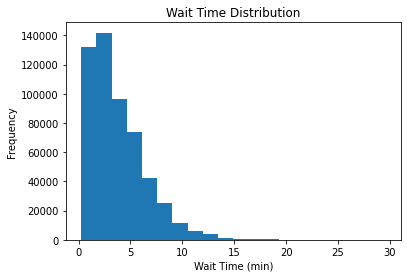

In [ ]:

user_df_b['Wait Time (min)'].plot.hist(bins=20)  
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [ ]:
food_df_b['Wait Time (min)'].describe()

count    1.143002e+06
mean     3.966046e+00
std      2.819983e+00
min      2.500000e-01
25%      1.833333e+00
50%      3.250000e+00
75%      5.500000e+00
max      2.825000e+01
Name: Wait Time (min), dtype: float64

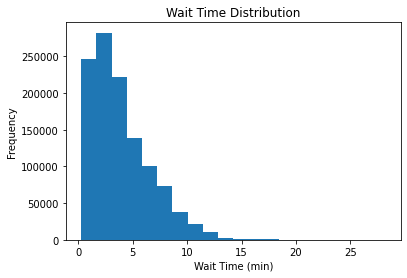

In [ ]:

food_df_b['Wait Time (min)'].plot.hist(bins=20) 
plt.xlabel('Wait Time (min)')
plt.ylabel('Frequency')
plt.title('Wait Time Distribution')
plt.show()

In [ ]:
bike_df_b.groupby('Event')['Distance Traveled'].describe()

,count,mean,std,min,25%,50%,75%,max
Event,,,,,,,,
END: bidding,1679410.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
END: endBid,1679410.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
END: in_use_packages,1143002.0,1374.689713,1117.802110,0.0,549.301042,1085.045653,1861.786021,6810.574838
END: in_use_people,536098.0,1623.243427,927.772932,0.0,998.954311,1436.235169,2018.945457,7619.097243
END: low_battery,72326.0,232.174749,159.556347,0.0,122.920747,211.833790,313.324245,1585.590035
END: picking_up_packages,1143002.0,487.715158,380.641104,0.0,211.833790,399.282546,700.528978,3782.366775
END: picking_up_people,536332.0,455.912923,369.135099,0.0,184.266654,384.733427,650.915358,3883.084725
END: rebalancing,52857.0,2199.278641,1416.356635,0.0,1174.009042,1951.314587,2841.326894,7292.656932
END: wandering,1797185.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Group by 'Event' and calculate the total distance for each 'Event' type
total_distance_by_event = bike_df_b.groupby('Event')['Distance Traveled'].sum()

# Calculate the total distance traveled across all 'Event' types
total_distance_all_events = total_distance_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_distance_by_event = (total_distance_by_event / total_distance_all_events) * 100

# Create a DataFrame to display the results
percentage_distance_df_b = pd.DataFrame({'Event': percentage_distance_by_event.index, 'Distance Percentage': percentage_distance_by_event.values})

# Display the result
print(percentage_distance_df_b)

                         Event  Distance Percentage
0                 END: bidding             0.000000
1                  END: endBid             0.000000
2         END: in_use_packages            46.535416
3           END: in_use_people            25.772691
4             END: low_battery             0.497326
5     END: picking_up_packages            16.509928
6       END: picking_up_people             7.241817
7             END: rebalancing             3.442823
8               END: wandering             0.000000
9               START: bidding             0.000000
10               START: endBid             0.000000
11      START: in_use_packages             0.000000
12        START: in_use_people             0.000000
13          START: low_battery             0.000000
14  START: picking_up_packages             0.000000
15    START: picking_up_people             0.000000
16          START: rebalancing             0.000000
17            START: wandering             0.000000


In [ ]:
#Group by 'Event' and calculate the total distance for each 'Event' type
total_time_by_event = bike_df_b.groupby('Event')['Duration (min)'].sum()

# Calculate the total time traveled across all 'Event' types
total_time_all_events = total_time_by_event.sum()

# Calculate the percentage of distance traveled for each 'Event' type
percentage_time_by_event = (total_time_by_event / total_time_all_events) * 100

# Create a DataFrame to display the results
percentage_time_df_b = pd.DataFrame({'Event': percentage_time_by_event.index, 'Time Percentage': percentage_time_by_event.values})

# Display the result
print(percentage_time_df_b)

                         Event  Time Percentage
0                 END: bidding         0.344071
1                  END: endBid         0.000000
2         END: in_use_packages         9.636221
3           END: in_use_people         4.179520
4             END: low_battery         0.117113
5     END: picking_up_packages         3.557430
6       END: picking_up_people         1.579437
7             END: rebalancing         0.485369
8               END: wandering        80.100838
9               START: bidding         0.000000
10               START: endBid         0.000000
11      START: in_use_packages         0.000000
12        START: in_use_people         0.000000
13          START: low_battery         0.000000
14  START: picking_up_packages         0.000000
15    START: picking_up_people         0.000000
16          START: rebalancing         0.000000
17            START: wandering         0.000000


# SUMMARY

### Served trips


In [ ]:
served_u = user_df_u.loc[user_df_u['Trip Served']== 1]
print('SERVED % USER: ', len(served_u)/len(user_df_u)*100)

served_f =  food_df_f.loc[food_df_f['Trip Served']== 1]
print('SERVED % FOOD: ', len(served_f)/len(food_df_f)*100, ' Unserved total:  ',len(food_df_f)-len(served_f))


served_u_M = user_df.loc[user_df['Trip Served']== 1]
print('SERVED % USER MIXED: ', len(served_u_M)/len(user_df)*100)
served_f_M = food_df.loc[food_df['Trip Served']== 1]
print('SERVED % FOOD MIXED: ', len(served_f_M)/len(food_df)*100)


served_u_B = user_df_b.loc[user_df_b['Trip Served']== 1]
print('SERVED % USER BIDDING: ', len(served_u_B)/len(user_df_b)*100)
served_f_B = food_df_b.loc[food_df_b['Trip Served']== 1]
print('SERVED % FOOD BIDDING: ', len(served_f_B)/len(food_df_b)*100)


SERVED % USER:  100.0
SERVED % FOOD:  99.9237213643028  Unserved total:   886
SERVED % USER MIXED:  100.0
SERVED % FOOD MIXED:  100.0
SERVED % USER BIDDING:  100.0
SERVED % FOOD BIDDING:  100.0


### Wait times

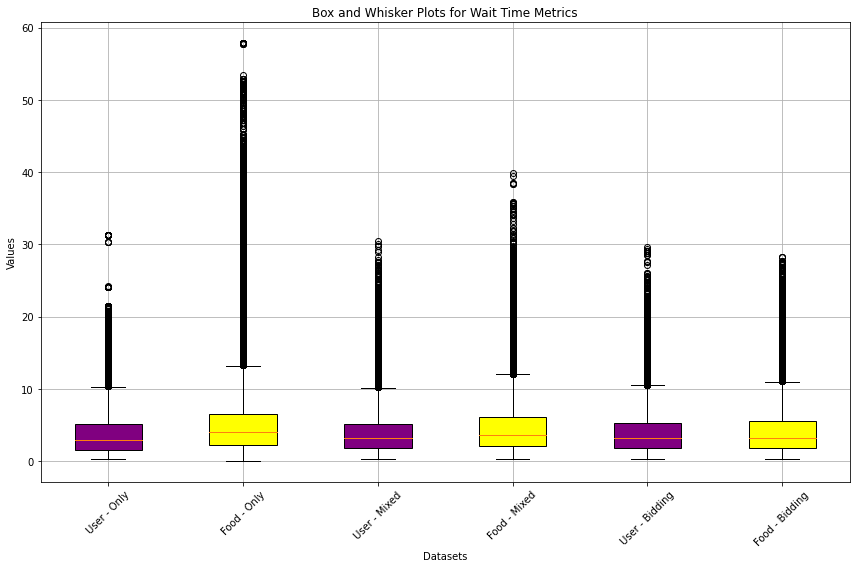

In [ ]:

# Set the columns you want to include in the plot
columns_to_plot = ['Wait Time (min)']

# Create a list of flattened data for each dataset
data_frames = [ user_df_u,food_df_f, user_df, food_df,  user_df_b, food_df_b]
labels = ['User - Only', 'Food - Only', 'User - Mixed', 'Food - Mixed', 'User - Bidding', 'Food - Bidding']

data = [df[columns_to_plot].values.flatten() for df in data_frames]

# Create a box and whisker plot for the combined data
plt.figure(figsize=(12, 8))

# Plot multiple boxes in one plot with custom colors
bp = plt.boxplot(data, labels=labels, patch_artist=True)

# Assign different colors to the boxes
colors = ['purple', 'yellow', 'purple', 'yellow', 'purple', 'yellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Box and Whisker Plots for Wait Time Metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
import numpy as np

# Calculate summary statistics for each dataset
summary_data = []

for df, label in zip(data_frames, labels):
    data = df[columns_to_plot].values.flatten()
    mean = data.mean()
    median = np.median(data)
    std = data.std()
    minimum = data.min()
    maximum = data.max()
    q10 = np.percentile(data, 10)
    q90 = np.percentile(data, 90)

    summary_data.append({
        'Dataset': label,
        'Mean': mean,
        'Median': median,
        'Std': std,
        'Min': minimum,
        'Q10': q10,
        'Q90': q90,
        'Max': maximum,
    })

# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)







In [ ]:
# Display the summary table
summary_df


,Dataset,Mean,Median,Std,Min,Q10,Q90,Max
0,User - Only,3.680714,2.916667,2.855766,0.25,0.916667,7.750000,31.250000
1,Food - Only,4.850235,4.000000,3.825735,0.00,1.250000,9.166667,57.833333
2,User - Mixed,3.795393,3.166667,2.678475,0.25,1.000000,7.333333,30.500000
3,Food - Mixed,4.404276,3.666667,3.128914,0.25,1.250000,8.583333,39.833333
4,User - Bidding,3.756973,3.166667,2.684608,0.25,0.916667,7.333333,29.583333
5,Food - Bidding,3.966046,3.250000,2.819982,0.25,1.000000,7.833333,28.250000


### Time

In [ ]:
# Define a mapping of old column names to new column names
column_mapping = {
   'END: bidding' : 'Bidding',
    'END: in_use_packages' : 'In use package',
    'END: in_use_people': 'In use rider',
    'END: low_battery': 'Recharge',
    'END: picking_up_packages' : 'Package pickup',
    'END: picking_up_people': 'Rider pickup',
    'END: rebalancing' : 'Rebalancing',
    'END: wandering': 'Idling'
}

# Create a new DataFrame with the renamed columns
time_b = percentage_time_df_b.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_b['New Column Name'] = time_b['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_b)

   New Column Name  Time Percentage
0          Bidding         0.344071
1              NaN         0.000000
2   In use package         9.636221
3     In use rider         4.179520
4         Recharge         0.117113
5   Package pickup         3.557430
6     Rider pickup         1.579437
7      Rebalancing         0.485369
8           Idling        80.100838
9              NaN         0.000000
10             NaN         0.000000
11             NaN         0.000000
12             NaN         0.000000
13             NaN         0.000000
14             NaN         0.000000
15             NaN         0.000000
16             NaN         0.000000
17             NaN         0.000000


In [ ]:
# Create a new DataFrame with the renamed columns
time = percentage_time_df.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time['New Column Name'] = time['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time)



   New Column Name  Time Percentage
0   In use package         9.611666
1     In use rider         4.169041
2         Recharge         0.118540
3   Package pickup         3.796549
4     Rider pickup         1.520493
5      Rebalancing         0.465148
6           Idling        80.318563
7              NaN         0.000000
8              NaN         0.000000
9              NaN         0.000000
10             NaN         0.000000
11             NaN         0.000000
12             NaN         0.000000
13             NaN         0.000000


In [ ]:
# Create a new DataFrame with the renamed columns
time_u = percentage_time_df_u.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_u['New Column Name'] = time_u['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_u)

  New Column Name  Time Percentage
0    In use rider         7.785165
1        Recharge         0.069464
2    Rider pickup         2.748288
3          Idling        89.397082
4             NaN         0.000000
5             NaN         0.000000
6             NaN         0.000000
7             NaN         0.000000


In [ ]:
# Create a new DataFrame with the renamed columns
time_f = percentage_time_df_f.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
time_f['New Column Name'] = time_f['New Column Name'].map(column_mapping)

# Display the DataFrame with renamed columns
print(time_f)

  New Column Name  Time Percentage
0  In use package        13.061193
1        Recharge         0.114921
2  Package pickup         5.714206
3     Rebalancing         0.633136
4          Idling        80.476545
5             NaN         0.000000
6             NaN         0.000000
7             NaN         0.000000
8             NaN         0.000000
9             NaN         0.000000


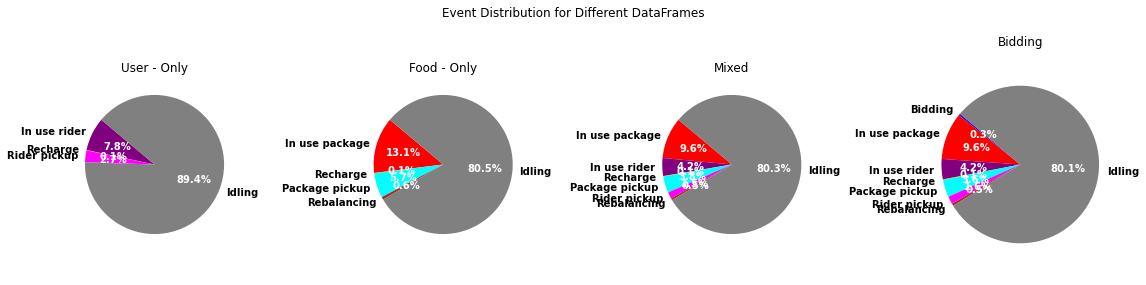

In [ ]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for pie charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white

# List to store the DataFrames
data_frames_pie = []

for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name'].unique()
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the pie chart with improved settings
    wedges, texts, autotexts = ax.pie(
        df['Time Percentage'],
        labels=df['New Column Name'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,  # Use the assigned colors from the color map
    )

    # Adjust text properties for better readability
    for text, autotext in zip(texts, autotexts):
        text.set(size=10, weight='bold', color='black')
        autotext.set(size=10, weight='bold', color='white')

    # Add a title for each subplot
    ax.set_title(titles[i])

    # Append the DataFrame to the list
    data_frames_pie.append(df)

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')

# Display the subplots
plt.axis('equal')  # Equal aspect ratio ensures that the pie charts are circular.
plt.tight_layout()
plt.show()


In [ ]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Concatenate the DataFrames along the rows, using the titles as keys
consolidated_df = pd.concat(data_frames, keys=titles)

# Reset the index for the consolidated DataFrame
consolidated_df.reset_index(level=0, inplace=True)
consolidated_df.rename(columns={'level_0': 'Title', 'New Column Name': 'Event'}, inplace=True)

# Aggregate the duplicate entries by taking the mean (you can also use sum)
pivot_df = consolidated_df.pivot_table(index='Event', columns='Title', values='Time Percentage', aggfunc='mean')



In [ ]:
pivot_df

Title,Bidding,Food - Only,Mixed,User - Only
Event,,,,
Bidding,0.344071,NaN,NaN,NaN
Idling,80.100838,80.476545,80.318563,89.397082
In use package,9.636221,13.061193,9.611666,NaN
In use rider,4.179520,NaN,4.169041,7.785165
Package pickup,3.557430,5.714206,3.796549,NaN
Rebalancing,0.485369,0.633136,0.465148,NaN
Recharge,0.117113,0.114921,0.118540,0.069464
Rider pickup,1.579437,NaN,1.520493,2.748288


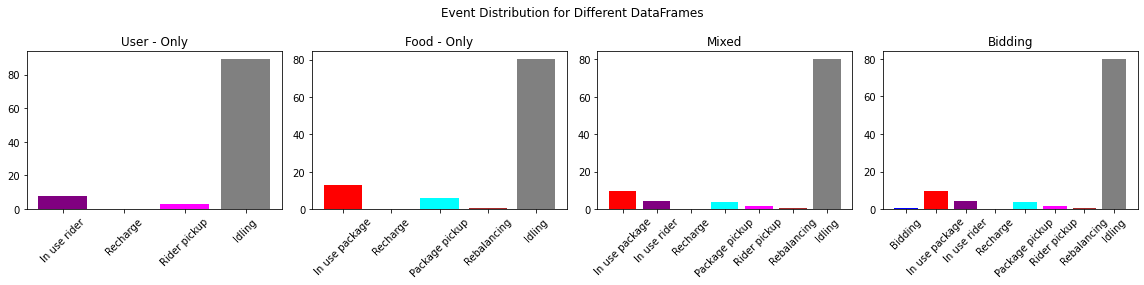

In [ ]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for bar charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white


for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name']
    values = df['Time Percentage']
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the bar chart with improved settings
    ax.bar(unique_rows, values, color=colors)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Add a title for each subplot
    ax.set_title(titles[i])

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')



# Display the subplots
plt.tight_layout()
plt.show()


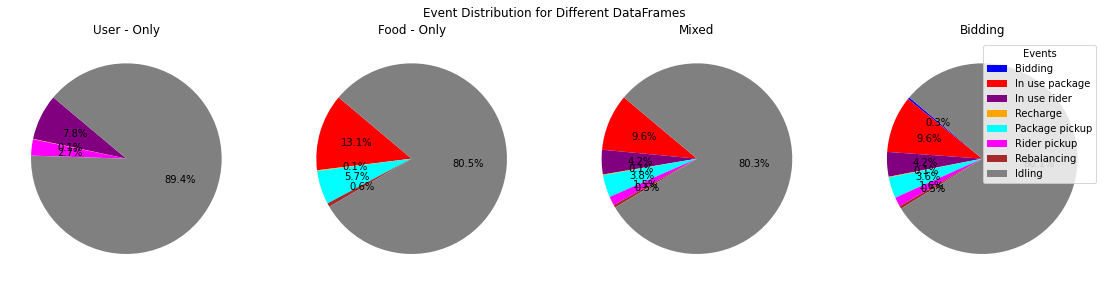

In [ ]:

# Create a list of DataFrames
data_frames = [time_u, time_f, time, time_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Define a color map to ensure consistent colors for the same row names
color_map = {
    'Bidding': 'blue',
    'In use package': 'red',
    'In use rider': 'purple',
    'Recharge': 'orange',
    'Package pickup': 'cyan',
    'Rider pickup': 'magenta',
    'Rebalancing': 'brown',
    'Idling': 'gray',
}

# Create subplots for pie charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor='white')  # Set facecolor to white

for i, ax in enumerate(axes):
    df = data_frames[i]

    # Filter out rows with Percentage > 0 (optional, to exclude zero percentage values)
    df = df[df['Time Percentage'] > 0]

    # Get unique row names and corresponding colors
    unique_rows = df['New Column Name'].unique()
    colors = [color_map.get(row, 'gray') for row in unique_rows]

    # Create the pie chart with improved settings
    wedges, texts, autotexts = ax.pie(
        df['Time Percentage'],
        labels=None,  # Remove labels from the pie
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,  # Use the assigned colors from the color map
    )

    # Add a title for each subplot
    ax.set_title(titles[i])

# Add a common title for all subplots
fig.suptitle('Event Distribution for Different DataFrames')

# Add a legend to the last subplot
axes[-1].legend(wedges, unique_rows, title="Events")

# Display the subplots
plt.tight_layout()
plt.show()



### Distance

In [ ]:
# Create a new DataFrame with the renamed columns
dist = percentage_distance_df.rename(columns={'Event': 'New Column Name'})
dist_u = percentage_distance_df_u.rename(columns={'Event': 'New Column Name'})
dist_f = percentage_distance_df_f.rename(columns={'Event': 'New Column Name'})
dist_b = percentage_distance_df_b.rename(columns={'Event': 'New Column Name'})

# Map the old column names to new column names
dist['New Column Name'] = dist['New Column Name'].map(column_mapping)
dist_u['New Column Name'] = dist_u['New Column Name'].map(column_mapping)
dist_f['New Column Name'] = dist_f['New Column Name'].map(column_mapping)
dist_b['New Column Name'] = dist_b['New Column Name'].map(column_mapping)


In [ ]:
# Create a list of DataFrames
data_frames = [dist_u, dist_f, dist, dist_b]
titles = ['User - Only', 'Food - Only', 'Mixed', 'Bidding']

# Concatenate the DataFrames along the rows, using the titles as keys
consolidated_df = pd.concat(data_frames, keys=titles)

# Reset the index for the consolidated DataFrame
consolidated_df.reset_index(level=0, inplace=True)
consolidated_df.rename(columns={'level_0': 'Title', 'New Column Name': 'Event'}, inplace=True)

# Aggregate the duplicate entries by taking the mean (you can also use sum)
pivot_df = consolidated_df.pivot_table(index='Event', columns='Title', values='Distance Percentage', aggfunc='mean')


In [ ]:
pivot_df

Title,Bidding,Food - Only,Mixed,User - Only
Event,,,,
Bidding,0.000000,NaN,NaN,NaN
Idling,0.000000,0.000000,0.000000,0.000000
In use package,46.535416,66.954301,46.084361,NaN
In use rider,25.772691,NaN,25.523868,78.899564
Package pickup,16.509928,28.554965,17.611724,NaN
Rebalancing,3.442823,3.975823,3.345543,NaN
Recharge,0.497326,0.514911,0.497702,0.490970
Rider pickup,7.241817,NaN,6.936802,20.609466


In [ ]:
print('User only dist: ' ,bike_df_u['Distance Traveled'].sum()/1000)
print('Food only dist: ' ,bike_df_f['Distance Traveled'].sum()/1000)
print('Mixed dist: ' ,bike_df['Distance Traveled'].sum()/1000)
print('Bidding dist: ' ,bike_df_b['Distance Traveled'].sum()/1000)


User only dist:  1102800.1221842454
Food only dist:  2344762.06826776
Mixed dist:  3409556.833613473
Bidding dist:  3376510.278186241
